<a href="https://colab.research.google.com/github/patel-star/Data-Scienceeee/blob/main/Feature_scaling_Normalization(minmaxScaling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Install Kaggle API
!pip install -q kaggle

# Upload your kaggle.json file
from google.colab import files
uploaded = files.upload()

# Move kaggle.json to the proper location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

# Download the dataset
!kaggle datasets download -d biyazejaan/wine-datacsv

# Unzip the dataset
import zipfile
with zipfile.ZipFile('wine-datacsv.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Verify files
!ls

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/biyazejaan/wine-datacsv
License(s): unknown
  0% 0.00/4.44k [00:00<?, ?B/s]
100% 4.44k/4.44k [00:00<00:00, 12.7MB/s]
sample_data  wine_data.csv  wine-datacsv.zip


In [7]:
import pandas as pd
df = pd.read_csv('wine_data.csv')
df.head()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv('wine_data.csv',usecols=[0,1,2]);
df.head()

,class_label,alcohol,malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [10]:
df.columns = ['class label','alcohol','malic acid']
df.head()

,class label,alcohol,malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='alcohol', ylabel='Density'>

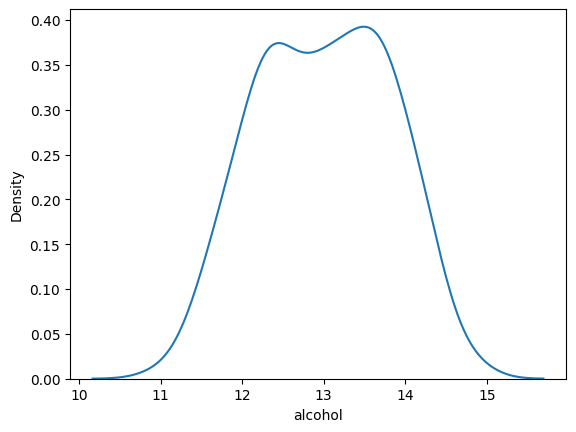

In [11]:
sns.kdeplot(df.alcohol)
# sns.kdeplot(df['alcohol'])

<Axes: xlabel='malic acid', ylabel='Density'>

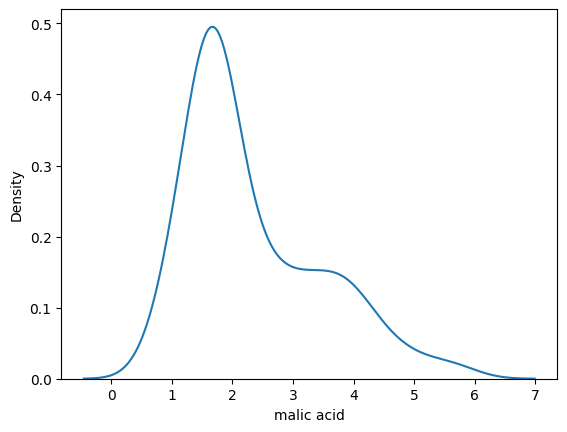

In [12]:
sns.kdeplot(df['malic acid'])

<Axes: xlabel='alcohol', ylabel='malic acid'>

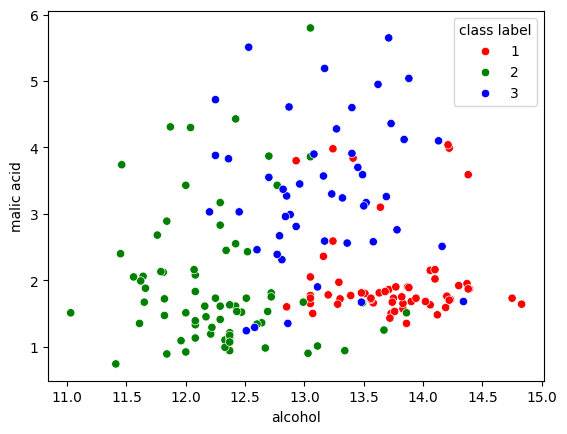

In [13]:
color_dict = {1:'red',2:'green',3:'blue'}
sns.scatterplot(x=df.alcohol,y=df['malic acid'],hue=df['class label'],palette=color_dict)


<Axes: xlabel='alcohol', ylabel='malic acid'>

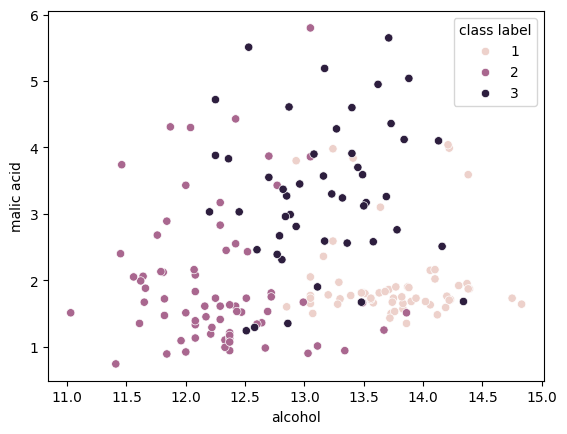

In [14]:
sns.scatterplot(x=df.alcohol,y=df['malic acid'],hue=df['class label'])

In [15]:
from sklearn.model_selection import train_test_split
x = df.drop('class label',axis=1)
y = df['class label']

# x_train,x_test,y_train,y_test = train_test_split(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# here the random state is used for reproducibility which make sure that data is split same way each time code is run agin

x_train.shape, x_test.shape

((124, 2), (54, 2))

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fitting the scaler to train set, it will learn the parameters
scaler.fit(x_train)

# now transform the train and test set
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
# now convert them again into dataframes preserving original columns names:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [18]:
x_train.sample(5)

,alcohol,malic acid
70,12.29,1.61
163,12.96,3.45
88,11.64,2.06
27,13.30,1.72
167,12.82,3.37


In [19]:
np.round(x_train_scaled.describe(),1)
np.round(x_train.describe(),1) # round up till 1 decomal place

,alcohol,malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


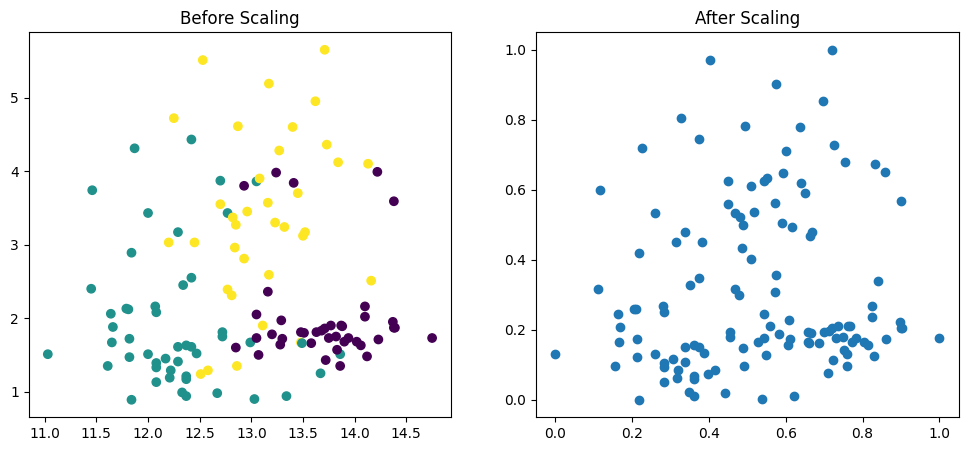

In [22]:
# this creates two fig. side by side like this:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# here y_train have set unique values so same type have same color:
ax1.scatter(x_train['alcohol'], x_train['malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['alcohol'], x_train_scaled['malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

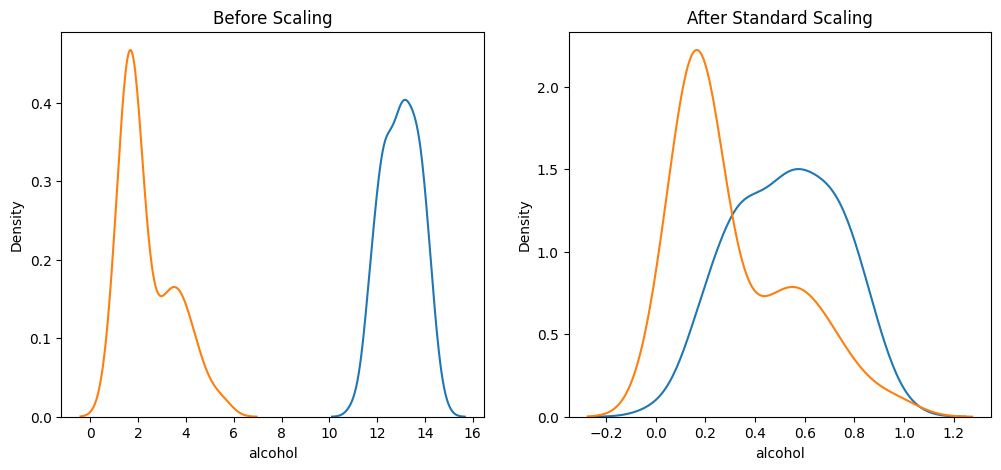

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)
sns.kdeplot(x_train['malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['malic acid'], ax=ax2)
plt.show()

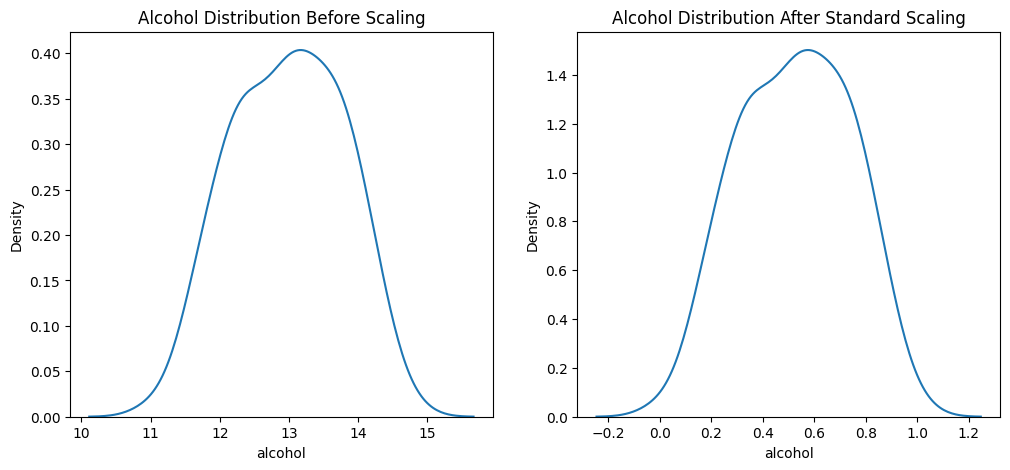

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
plt.show()

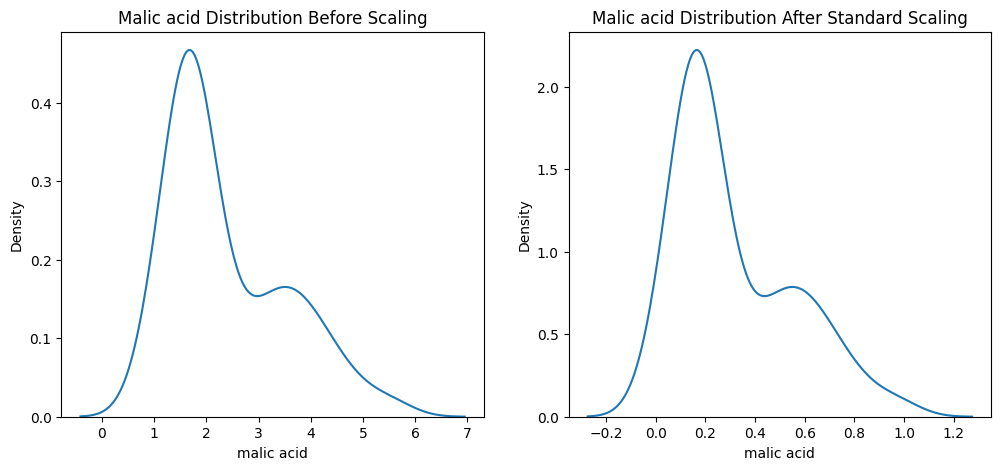

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(x_train['malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['malic acid'], ax=ax2)
plt.show()